# Non-Clifford CNOT-Dihedral Interleaved Randomized Benchmarking 
# of a CX gate

In [1]:
#Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

#Import Qiskit classes
import qiskit
from qiskit.providers.aer.noise import NoiseModel, errors
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error
from qiskit.quantum_info.operators import Operator

#Import the RB Functions
import qiskit.ignis.verification.randomized_benchmarking as rb

#from examples import CS_utils

In [2]:
#Number of qubits
nQ = 2
#There are 2 qubits: Q0,Q1.
#Number of seeds (random sequences)
nseeds = 10
#Number of Cliffords in the sequence 
nCliffs = [1,5,10,20,30,50,75,100,125,150]
#2Q RB on Q0,Q1 
rb_pattern = [[0,1]]
# Non-Clifford RB
group_gates = 'CNOT-Dihedral'

### Interleaved RB with a CX gate 

Defining a CS gate using an operator.

In [3]:
rb_opts = {}
rb_opts['length_vector'] = nCliffs
rb_opts['nseeds'] = nseeds
rb_opts['rb_pattern'] = rb_pattern
rb_opts['group_gates'] = group_gates
rb_opts['align_cliffs'] = True

CS01 = rb.dihedral.CNOTDihedral(2)
CS01.phase(1, 0)
CS01.phase(1, 1)
CS01.cnot(0, 1)
CS01.phase(7, 1)
CS01.cnot(0, 1)

CX01 = rb.dihedral.CNOTDihedral(2)
CX01.cnot(0, 1)

cs = Operator([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1j]])

## interleaved CX gate
rb_opts['interleaved_gates'] = [(CX01, [('cx', 0, 1)])]

rb_cnotdihedral_Z_circs, xdata, rb_cnotdihedral_X_circs, rb_cnotdihedral_interleaved_Z_circs, \
rb_cnotdihedral_interleaved_X_circs = rb.randomized_benchmarking_seq(**rb_opts)

In [4]:
print (rb_cnotdihedral_Z_circs[0][0])

          ┌───┐          ┌───┐┌────────────┐                  ░  ░ »
qr_0: ────┤ X ├──────────┤ X ├┤ U1(2.3562) ├──■───────────────░──░─»
      ┌───┴───┴────┐┌───┐└─┬─┘└────────────┘┌─┴─┐┌──────────┐ ░  ░ »
qr_1: ┤ U1(2.3562) ├┤ X ├──■────────────────┤ X ├┤ U1(pi/2) ├─░──░─»
      └────────────┘└───┘                   └───┘└──────────┘ ░  ░ »
cr_0: ═════════════════════════════════════════════════════════════»
                                                                   »
cr_1: ═════════════════════════════════════════════════════════════»
                                                                   »
«                         ┌───────────┐┌───┐┌───┐             ┌─┐   
«qr_0: ────────────────■──┤ U1(3.927) ├┤ X ├┤ X ├─────────────┤M├───
«      ┌────────────┐┌─┴─┐└───────────┘└─┬─┘├───┤┌───────────┐└╥┘┌─┐
«qr_1: ┤ U1(4.7124) ├┤ X ├───────────────■──┤ X ├┤ U1(3.927) ├─╫─┤M├
«      └────────────┘└───┘                  └───┘└───────────┘ ║ └╥┘
«cr_0: ═══════════════════════════

In [5]:
print (rb_cnotdihedral_interleaved_Z_circs[0][0])

          ┌───┐          ┌───┐┌────────────┐                  ░       ░  ░ »
qr_0: ────┤ X ├──────────┤ X ├┤ U1(2.3562) ├──■───────────────░───■───░──░─»
      ┌───┴───┴────┐┌───┐└─┬─┘└────────────┘┌─┴─┐┌──────────┐ ░ ┌─┴─┐ ░  ░ »
qr_1: ┤ U1(2.3562) ├┤ X ├──■────────────────┤ X ├┤ U1(pi/2) ├─░─┤ X ├─░──░─»
      └────────────┘└───┘                   └───┘└──────────┘ ░ └───┘ ░  ░ »
cr_0: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_1: ═════════════════════════════════════════════════════════════════════»
                                                                           »
«      ┌───────────┐┌───┐┌───┐ ┌──────────┐┌─┐   
«qr_0: ┤ U1(3.927) ├┤ X ├┤ X ├─┤ U1(pi/2) ├┤M├───
«      └───────────┘└─┬─┘├───┤┌┴──────────┤└╥┘┌─┐
«qr_1: ───────────────■──┤ X ├┤ U1(3.927) ├─╫─┤M├
«                        └───┘└───────────┘ ║ └╥┘
«cr_0: ═════════════════════════════════════╩══╬═
«      

In [6]:
print (rb_cnotdihedral_X_circs[0][0])

      ┌───┐ ░     ┌───┐          ┌───┐┌────────────┐                  ░  ░ »
qr_0: ┤ H ├─░─────┤ X ├──────────┤ X ├┤ U1(2.3562) ├──■───────────────░──░─»
      ├───┤ ░ ┌───┴───┴────┐┌───┐└─┬─┘└────────────┘┌─┴─┐┌──────────┐ ░  ░ »
qr_1: ┤ H ├─░─┤ U1(2.3562) ├┤ X ├──■────────────────┤ X ├┤ U1(pi/2) ├─░──░─»
      └───┘ ░ └────────────┘└───┘                   └───┘└──────────┘ ░  ░ »
cr_0: ═════════════════════════════════════════════════════════════════════»
                                                                           »
cr_1: ═════════════════════════════════════════════════════════════════════»
                                                                           »
«                         ┌───────────┐┌───┐┌───┐      ░      ┌───┐     ┌─┐   
«qr_0: ────────────────■──┤ U1(3.927) ├┤ X ├┤ X ├──────░──────┤ H ├─────┤M├───
«      ┌────────────┐┌─┴─┐└───────────┘└─┬─┘├───┤┌───────────┐└─░─┘┌───┐└╥┘┌─┐
«qr_1: ┤ U1(4.7124) ├┤ X ├───────────────■──┤ X ├┤ U1(3.927) ├──░──┤ H

In [7]:
print (rb_cnotdihedral_interleaved_X_circs[0][0])

      ┌───┐ ░     ┌───┐          ┌───┐┌────────────┐                  ░      »
qr_0: ┤ H ├─░─────┤ X ├──────────┤ X ├┤ U1(2.3562) ├──■───────────────░───■──»
      ├───┤ ░ ┌───┴───┴────┐┌───┐└─┬─┘└────────────┘┌─┴─┐┌──────────┐ ░ ┌─┴─┐»
qr_1: ┤ H ├─░─┤ U1(2.3562) ├┤ X ├──■────────────────┤ X ├┤ U1(pi/2) ├─░─┤ X ├»
      └───┘ ░ └────────────┘└───┘                   └───┘└──────────┘ ░ └───┘»
cr_0: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
cr_1: ═══════════════════════════════════════════════════════════════════════»
                                                                             »
«       ░  ░ ┌───────────┐┌───┐┌───┐ ┌──────────┐ ░ ┌───┐┌─┐   
«qr_0: ─░──░─┤ U1(3.927) ├┤ X ├┤ X ├─┤ U1(pi/2) ├─░─┤ H ├┤M├───
«       ░  ░ └───────────┘└─┬─┘├───┤┌┴──────────┤ ░ ├───┤└╥┘┌─┐
«qr_1: ─░──░────────────────■──┤ X ├┤ U1(3.927) ├─░─┤ H ├─╫─┤M├
«       ░  ░                   └─

### Add a depolarize noise to the CS gate

In [8]:
cs = Operator([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0],
               [0, 0, 0, 1j]])

### Add depolarizing error to "cs" gate

p1Q = 0.0005
p2Q = 0.01/0.75

# Construct the error
cs_error = errors.depolarizing_error(p2Q, 2)
print ("Depolarizing errors on u2,u3,cs,cx gates respectively:", p1Q, 2*p1Q, p2Q, p2Q)

# Build the noise model by adding the error to the "cs" gate
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Q, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(2*p1Q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Q, 2), 'cx')
noise_model.add_all_qubit_quantum_error(cs_error, 'cs')
print (noise_model)

noise_model.add_basis_gates(['unitary'])
basis_gates = noise_model.basis_gates
print("basis_gates:", basis_gates)

Depolarizing errors on u2,u3,cs,cx gates respectively: 0.0005 0.001 0.013333333333333334 0.013333333333333334
NoiseModel:
  Basis gates: ['cx', 'id', 'u2', 'u3']
  Instructions with noise: ['u2', 'cs', 'cx', 'u3']
  All-qubits errors: ['u2', 'u3', 'cx', 'cs']
basis_gates: ['cx', 'id', 'u2', 'u3', 'unitary']


### Execute the RB sequences

In [9]:
#CNOT-Dihedral RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_X_result_list = []
cnotdihedral_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_X_result_list.append(job.result())
    cnotdihedral_X_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Compiling seed 5
Simulating seed 5
Compiling seed 6
Simulating seed 6
Compiling seed 7
Simulating seed 7
Compiling seed 8
Simulating seed 8
Compiling seed 9
Simulating seed 9
Finished Simulating CNOT-Dihedral X Circuits


In [10]:
#CNOT-Dihedral interleaved RB X circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_interleaved_X_result_list = []
cnotdihedral_interleaved_X_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_interleaved_X_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_interleaved_X_result_list.append(job.result())
    cnotdihedral_interleaved_X_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Interleaved X Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Compiling seed 5
Simulating seed 5
Compiling seed 6
Simulating seed 6
Compiling seed 7
Simulating seed 7
Compiling seed 8
Simulating seed 8
Compiling seed 9
Simulating seed 9
Finished Simulating CNOT-Dihedral Interleaved X Circuits


In [11]:
#CNOT-Dihedral RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_Z_result_list = []
cnotdihedral_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_Z_result_list.append(job.result())
    cnotdihedral_Z_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Compiling seed 5
Simulating seed 5
Compiling seed 6
Simulating seed 6
Compiling seed 7
Simulating seed 7
Compiling seed 8
Simulating seed 8
Compiling seed 9
Simulating seed 9
Finished Simulating CNOT-Dihedral Z Circuits


In [12]:
#CNOT-Dihedral inteleaved RB Z circuits
backend = qiskit.Aer.get_backend('qasm_simulator')
#basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 200
cnotdihedral_interleaved_Z_result_list = []
cnotdihedral_interleaved_Z_qobj_list = []
import time
for rb_seed,rb_circ_seed in enumerate(rb_cnotdihedral_interleaved_Z_circs):
    print('Compiling seed %d'%rb_seed)
    new_rb_circ_seed = qiskit.compiler.transpile(rb_circ_seed, basis_gates=basis_gates)
    qobj = qiskit.compiler.assemble(new_rb_circ_seed, shots=shots)
    print('Simulating seed %d'%rb_seed)
    job = backend.run(qobj, noise_model=noise_model, backend_options={'max_parallel_experiments': 0})
    cnotdihedral_interleaved_Z_result_list.append(job.result())
    cnotdihedral_interleaved_Z_qobj_list.append(qobj)    
print("Finished Simulating CNOT-Dihedral Interleaved Z Circuits")

Compiling seed 0
Simulating seed 0
Compiling seed 1
Simulating seed 1
Compiling seed 2
Simulating seed 2
Compiling seed 3
Simulating seed 3
Compiling seed 4
Simulating seed 4
Compiling seed 5
Simulating seed 5
Compiling seed 6
Simulating seed 6
Compiling seed 7
Simulating seed 7
Compiling seed 8
Simulating seed 8
Compiling seed 9
Simulating seed 9
Finished Simulating CNOT-Dihedral Interleaved Z Circuits


### Fit the results

In [13]:
#Create the cnot-dihedral Z and X RB fitters
cnotdihedral_Z_rb_fit = rb.RBFitter(cnotdihedral_Z_result_list, xdata, rb_opts['rb_pattern'])
cnotdihedral_X_rb_fit = rb.RBFitter(cnotdihedral_X_result_list, xdata, rb_opts['rb_pattern'])

In [14]:
# Print the Z circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of Z circuits:', cnotdihedral_Z_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of Z circuits: {'params': array([0.73533793, 0.97546292, 0.23859104]), 'params_err': array([0.01063796, 0.00123576, 0.00954296]), 'epc': 0.018402812278392133, 'epc_err': 0.0009501336050159451}


In [15]:
# Print the X circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of X circuits:', cnotdihedral_X_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of X circuits: {'params': array([0.73171581, 0.97486402, 0.24157667]), 'params_err': array([0.01035458, 0.00110907, 0.00978803]), 'epc': 0.0188519870394728, 'epc_err': 0.000853247307669103}


In [16]:
#Create the cnot-dihedral intelreaved Z and X RB fitters
cnotdihedral_interleaved_Z_rb_fit = rb.RBFitter(cnotdihedral_interleaved_Z_result_list, xdata, rb_opts['rb_pattern'])
cnotdihedral_interleaved_X_rb_fit = rb.RBFitter(cnotdihedral_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

In [17]:
# Print the interleaved Z circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of interleaved Z circuits:', cnotdihedral_interleaved_Z_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of interleaved Z circuits: {'params': array([0.73273866, 0.9626045 , 0.24613503]), 'params_err': array([0.00750103, 0.00131728, 0.00587345]), 'epc': 0.028046622638758567, 'epc_err': 0.0010263421754856694}


In [18]:
# Print the interleaved X circuits fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB of interleaved X circuits:', cnotdihedral_interleaved_X_rb_fit.fit[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB of interleaved X circuits: {'params': array([0.73438629, 0.96372029, 0.23850286]), 'params_err': array([0.0039306 , 0.0006422 , 0.00338886]), 'epc': 0.027209785104786277, 'epc_err': 0.000499783827492588}


In [19]:
#Calculate the joint fitter
joint_rb_fit = rb.CNOTDihedralRBFitter(cnotdihedral_Z_result_list, cnotdihedral_X_result_list, xdata, rb_opts['rb_pattern'])
joint_int_rb_fit = rb.CNOTDihedralRBFitter(cnotdihedral_interleaved_Z_result_list, cnotdihedral_interleaved_X_result_list, xdata, rb_opts['rb_pattern'])

### Calculate the fidelity

In [20]:
#Print the joint fitter parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral RB:', joint_rb_fit.fit_cnotdihedral[patt_ind])
#Print the joint interleaved parameters
for patt_ind, pattern in enumerate(rb_pattern):
    print ('pattern:', patt_ind, '-', len(pattern), 'qubit cnot-dihedral interleaved RB:', joint_int_rb_fit.fit_cnotdihedral[patt_ind])

pattern: 0 - 2 qubit cnot-dihedral RB: {'alpha': 0.974983797216991, 'alpha_err': 0.0009447397988570426, 'epg_est': 0.018762152087256734, 'epg_est_err': 0.0007267349992536204}
pattern: 0 - 2 qubit cnot-dihedral interleaved RB: {'alpha': 0.9634971298512257, 'alpha_err': 0.0005992540695824901, 'epg_est': 0.02737715261158072, 'epg_est_err': 0.0004664679719972451}


In [21]:
#Expected error of the interleaved cs gate
alpha = joint_rb_fit.fit_cnotdihedral[0]['alpha']
alpha_c = joint_int_rb_fit.fit_cnotdihedral[0]['alpha']
alpha_err = joint_rb_fit.fit_cnotdihedral[0]['alpha_err']
alpha_c_err = joint_rb_fit.fit_cnotdihedral[0]['alpha_err']

nrb = 2 ** nQ
r_est = (nrb - 1) * (1 - alpha_c / alpha) / nrb

alpha_err_sq = (alpha_err / alpha) * (alpha_err / alpha)
alpha_c_err_sq = (alpha_c_err / alpha_c) * (alpha_c_err / alpha_c)
r_est_err = ((nrb - 1) / nrb) * (alpha_c / alpha) * (np.sqrt(alpha_err_sq + alpha_c_err_sq))

print ("Estimated gate error: %f (%f)" %(r_est, r_est_err))
print('RB fidelity = %.5f' % (1 - r_est))

Estimated gate error: 0.008836 (0.001022)
RB fidelity = 0.99116


### Plot the results

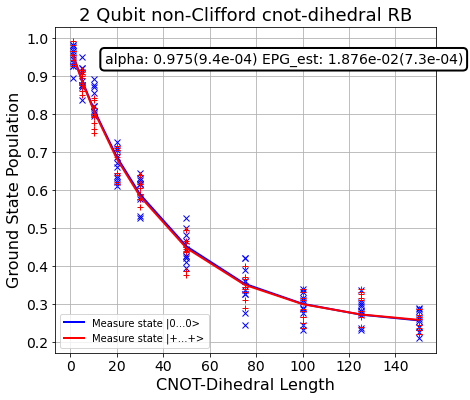

In [22]:
#Plot the joint RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford cnot-dihedral RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()

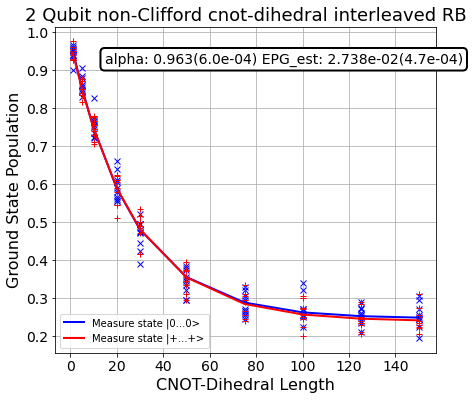

In [23]:
#Plot the joint interleaved RB data
plt.figure(figsize=(15, 6))

for i in range(1):
    ax = plt.subplot(1, 2, i+1)
    pattern_ind = i

    # Plot the essence by calling plot_rb_data
    joint_int_rb_fit.plot_rb_data(pattern_ind, ax=ax, add_label=True, show_plt=False)

    # Add title and label
    ax.set_title('%d Qubit non-Clifford cnot-dihedral interleaved RB'%(len(rb_opts['rb_pattern'][i])), fontsize=18)

plt.show()